# Batch Normalization

In [11]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Flatten, Dense, BatchNormalization

In [12]:
f_mnist = tf.keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = f_mnist.load_data()

# Creating validataion from train_full data
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scaling the dataset for Normalization
x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0

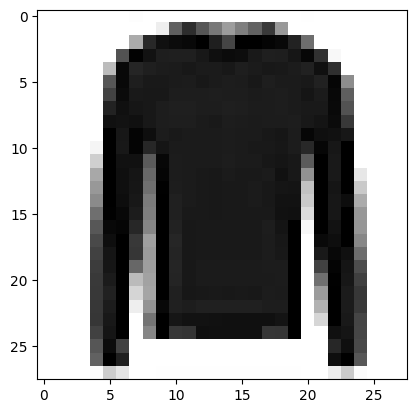

In [13]:
# Let's visualize some data

plt.imshow(x_train[10000], cmap= "binary")
plt.show()

<Axes: >

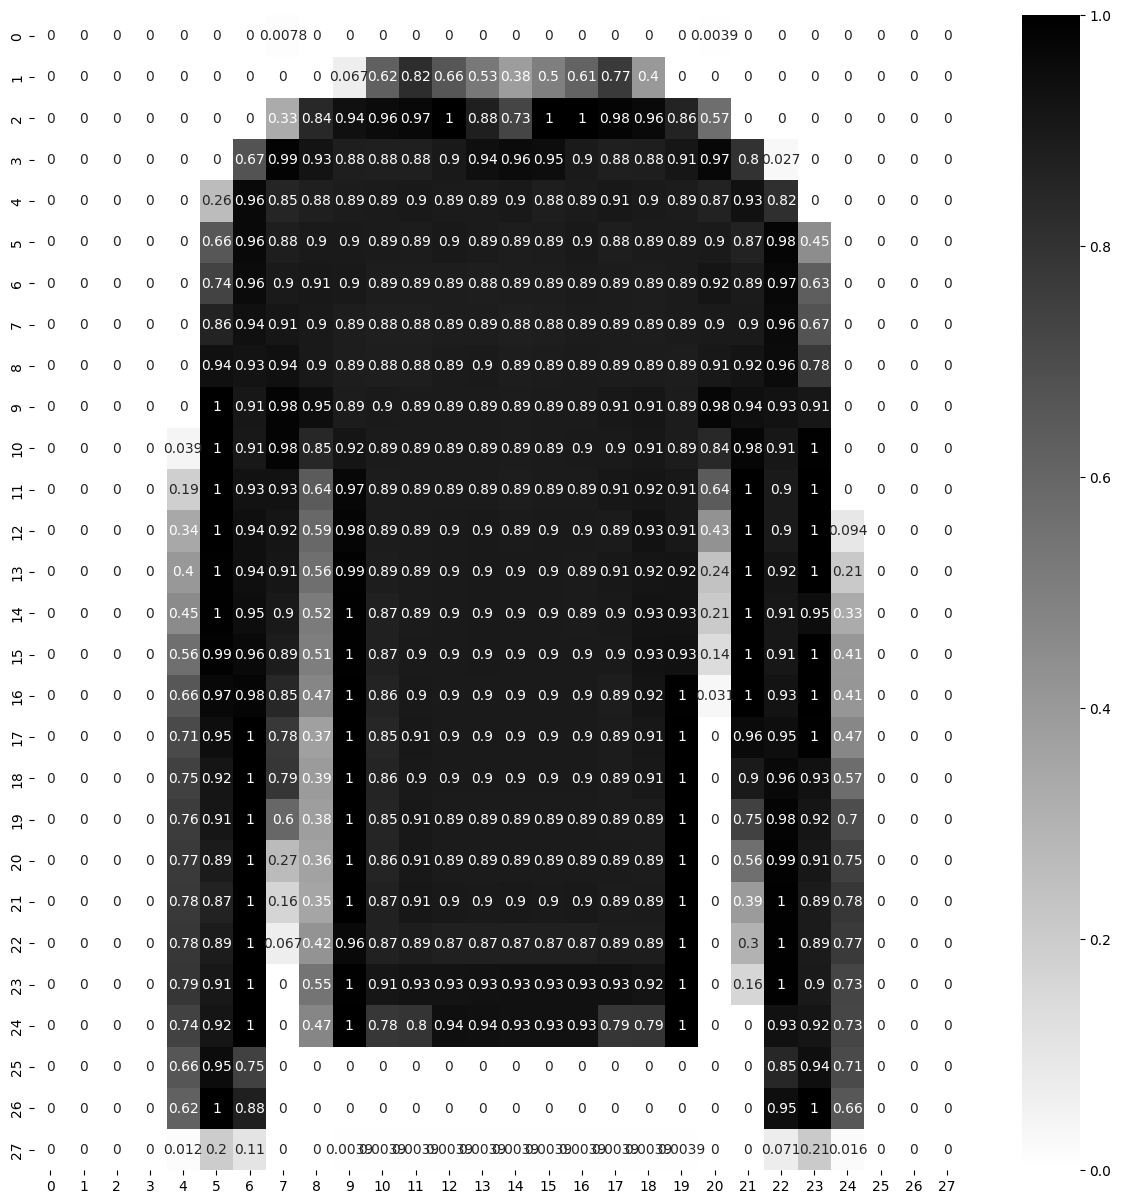

In [14]:
plt.figure(figsize = (15, 15))
sns.heatmap(x_train[10000], annot = True, cmap = "binary")

## Without Normalization

In [15]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape = [28,28], name = "InputLayer"),
    tf.keras.layers.Dense(300, name = "HiddenLayer1", kernel_initializer= "he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(100, name = "HiddenLayer2", kernel_initializer= "he_normal"),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(10, activation= "softmax", name = "OutputLayer")
]

model = tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(loss= "sparse_categorical_crossentropy",
              optimizer= tf.keras.optimizers.SGD(learning_rate= 1e-3),
              metrics = ["accuracy"])

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## Training an ANN model

In [18]:
start = time.time()

history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid), verbose = 2)

end = time.time()

print("Runtime of the program: ", end - start)

Epoch 1/10
1719/1719 - 6s - 3ms/step - accuracy: 0.5903 - loss: 1.3104 - val_accuracy: 0.7326 - val_loss: 0.8764
Epoch 2/10
1719/1719 - 9s - 5ms/step - accuracy: 0.7406 - loss: 0.7895 - val_accuracy: 0.7710 - val_loss: 0.7030
Epoch 3/10
1719/1719 - 4s - 2ms/step - accuracy: 0.7739 - loss: 0.6784 - val_accuracy: 0.7958 - val_loss: 0.6306
Epoch 4/10
1719/1719 - 4s - 2ms/step - accuracy: 0.7916 - loss: 0.6206 - val_accuracy: 0.8112 - val_loss: 0.5855
Epoch 5/10
1719/1719 - 4s - 2ms/step - accuracy: 0.8038 - loss: 0.5834 - val_accuracy: 0.8154 - val_loss: 0.5556
Epoch 6/10
1719/1719 - 6s - 3ms/step - accuracy: 0.8119 - loss: 0.5569 - val_accuracy: 0.8206 - val_loss: 0.5358
Epoch 7/10
1719/1719 - 4s - 2ms/step - accuracy: 0.8182 - loss: 0.5367 - val_accuracy: 0.8306 - val_loss: 0.5171
Epoch 8/10
1719/1719 - 5s - 3ms/step - accuracy: 0.8226 - loss: 0.5206 - val_accuracy: 0.8318 - val_loss: 0.5032
Epoch 9/10
1719/1719 - 5s - 3ms/step - accuracy: 0.8261 - loss: 0.5075 - val_accuracy: 0.8368 - 

In [19]:
#del model          #to delete the model but not using it(instead using different model name with Bacth Normalization)

## With Batch Normalization

In [20]:
LAYERS_BN = [
    tf.keras.layers.Flatten(input_shape = [28,28], name = "InputLayer"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation = "relu", name = "HiddenLayer1", kernel_initializer= "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = "relu", name = "HiddenLayer2", kernel_initializer= "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation= "softmax", name = "OutputLayer")
]

model_bn = tf.keras.models.Sequential(LAYERS_BN)

In [21]:
784 * 4           # 4 paras(2 trainable, 2 non-trainable)

3136

In [22]:
300 * 4

1200

In [23]:
100 * 4

400

In [24]:
# Non - trainable params, i.e. mean and std

(784 + 300 + 100) * 2

2368

In [25]:
# Trainable params

bn_params = (784 + 300 + 100) * 2  # gamma and beta
weight = (784 * 300) + (300 * 100) + (100 * 10)
bias = 300 + 100 + 10
total = bn_params + weight + bias
total


268978

In [26]:
model_bn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [27]:
bn1 = model_bn.layers[1]

In [28]:
for variable in bn1.variables:
    print(variable.name, variable.trainable)


gamma True
beta True
moving_mean False
moving_variance False


In [29]:
model_bn.compile(loss= "sparse_categorical_crossentropy",
              optimizer= tf.keras.optimizers.SGD(learning_rate= 1e-3),
              metrics = ["accuracy"])

In [30]:
start = time.time()

history = model_bn.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid), verbose = 2)

end = time.time()

print("Runtime of the program after Batch Normalization: ", end - start)

Epoch 1/10
1719/1719 - 7s - 4ms/step - accuracy: 0.6938 - loss: 0.9299 - val_accuracy: 0.7930 - val_loss: 0.6120
Epoch 2/10
1719/1719 - 4s - 2ms/step - accuracy: 0.7887 - loss: 0.6192 - val_accuracy: 0.8248 - val_loss: 0.5168
Epoch 3/10
1719/1719 - 5s - 3ms/step - accuracy: 0.8102 - loss: 0.5507 - val_accuracy: 0.8390 - val_loss: 0.4747
Epoch 4/10
1719/1719 - 5s - 3ms/step - accuracy: 0.8217 - loss: 0.5130 - val_accuracy: 0.8476 - val_loss: 0.4454
Epoch 5/10
1719/1719 - 5s - 3ms/step - accuracy: 0.8306 - loss: 0.4848 - val_accuracy: 0.8568 - val_loss: 0.4270
Epoch 6/10
1719/1719 - 5s - 3ms/step - accuracy: 0.8380 - loss: 0.4664 - val_accuracy: 0.8606 - val_loss: 0.4128
Epoch 7/10
1719/1719 - 4s - 2ms/step - accuracy: 0.8414 - loss: 0.4526 - val_accuracy: 0.8636 - val_loss: 0.4010
Epoch 8/10
1719/1719 - 4s - 2ms/step - accuracy: 0.8448 - loss: 0.4401 - val_accuracy: 0.8650 - val_loss: 0.3932
Epoch 9/10
1719/1719 - 4s - 3ms/step - accuracy: 0.8506 - loss: 0.4274 - val_accuracy: 0.8670 - 